# Agentic AI

- David Guo - guest lecture for UTSA ECON6763

# What is agentic AI?
You can ask Google for ChatGTP to get answer, But we will do it in a different way...
 * Before we get answer, let us set up some tools - VS code IDE, if you have not done that. 
 * Set up a coding assistant - GitHub copilot and GitHub coplit chat

# Agentic AI thru Model Context Protocol (MCP)
MCP is an open protocol that standardizes how applications provide context to self-defined functions or LLMs.
- https://modelcontextprotocol.io/quickstart/user
- Youtube video @ https://www.youtube.com/watch?v=CDjjaTALI68

In [1]:
#import the credentials
try:
    from dotenv import load_dotenv
    load_dotenv()
except:
    !pip install python-dotenv
    from dotenv import load_dotenv
    load_dotenv()  # This will load .env into os.environ

In [3]:
import os
TIMEOUT = os.environ.get("TIMEOUT") #get Timeout from environment variable
TIMEOUT

'10'

# Create a Vector Search DB - LanceDB

In [8]:
pip install numpy==1.26.4 -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install sentence_transformers -U -q

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.


In [2]:
from sentence_transformers import SentenceTransformer

In [7]:
pip install lancedb -q

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.


In [27]:
import pickle, os, sys, time, gc
import pandas as pd
import lancedb #pip install lancedb -q
import lance #pip install pylance -q
from lance.vector import vec_to_table
import numpy as np
import struct
import pyarrow as pa
import pyarrow.dataset
from tqdm import trange

In [25]:
# Global database URI
LanceDB_URI = os.environ.get("LANCEDB_URI")
LanceDB_URI

In [5]:
ticker_embed1 = pickle.load(open("desc_embeddings1.pkl", "rb"))
ticker_embed2 = pickle.load(open("desc_embeddings2.pkl", "rb"))

In [14]:
ticker_embeddings = np.concatenate([ticker_embed1, ticker_embed2]) 

In [7]:
ticker_embde.shape

(7374, 1024)

In [5]:
#pickle.dump(ticker_desc, open("ticker_desc_df.pkl", "wb"))

In [8]:
ticker_desc = pickle.load(open("ticker_desc_df.pkl", "rb"))
type(ticker_desc)

pandas.core.frame.DataFrame

In [9]:
print(ticker_desc.shape)
ticker_desc.head()

(7374, 2)


,ticker,description
0,NVDA,Description\nNVIDIA Corporation provides graph...
1,AAPL,"Description\nApple Inc. designs, manufactures,..."
2,MSFT,Description\nMicrosoft Corporation develops an...
3,AMZN,"Description\nAmazon.com, Inc. engages in the r..."
4,GOOGL,Description\nAlphabet Inc. offers various prod...


In [21]:
ticker_desc.ticker.nunique()

7374

# Create dense vector for each description
- choose embedding model 
   - https://lancedb.com/docs/embedding/
   - https://huggingface.co/spaces/mteb/leaderboard
- embed description to dense vector with fix length

In [10]:
# use a medium size embedding model 'all-MiniLM-L6-v2' takes a maximum of 256 word pieces (tokens)
# and maps to a 384 dimensional dense vector space
embed_model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\ydk152\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ydk152\.cache\huggingface\hub\models--intfloat--multilingual-e5-large-instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_xlm-roberta_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

In [11]:
embedding = embed_model.encode(ticker_desc.description[0])

In [12]:
embedding

array([ 0.00963674, -0.01168198, -0.05435823, ..., -0.0371392 ,
       -0.029288  ,  0.01003205], dtype=float32)

In [ ]:
%%time 

desc_embeddings = embed_model.encode(ticker_desc.description.tolist(), batch_size = 20, show_progress_bar=True) 

Batches:   0%|          | 0/738 [00:00<?, ?it/s]

CPU times: user 1min 43s, sys: 1.37 s, total: 1min 44s
Wall time: 1min 37s


In [13]:
desc_embeddings.shape

NameError: name 'desc_embeddings' is not defined

In [15]:
#desc_embeddings = pickle.load(open("desc_embeddings.pkl", "rb")) 

In [30]:
# #split desc_embeddings to 2 files to avoid Github file size limit of 25M
# pickle.dump(desc_embeddings[:4000], open("desc_embeddings1.pkl", "wb")) 
# pickle.dump(desc_embeddings[4000::], open("desc_embeddings2.pkl", "wb")) 

In [ ]:
#pickle.dump(desc_embeddings, open("desc_embeddings.pkl", "wb")) 

In [17]:
# convert to LanceDB table
ticker_desc_dict = dict(zip(ticker_desc['ticker'], ticker_embeddings))

In [19]:
#ticker_desc_dict

In [14]:
list(ticker_desc_dict.keys())[:5]

['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL']

In [20]:
desc_table = vec_to_table(ticker_desc_dict)

In [21]:
# update `desc_table` with description column
desc_table = desc_table.append_column("Description", pa.array(ticker_desc.description))

In [23]:
desc_table.shape

(7374, 3)

In [29]:
#declare a LanceDB instance
#ticker_db = lancedb.connect(LanceDB_URI) #

In [18]:
%%time

ticker_db_tbl = ticker_db.create_table(LanceDB_URI, desc_table, mode="overwrite")

CPU times: user 25 ms, sys: 91.6 ms, total: 117 ms
Wall time: 104 ms


# Disk-based Index

### IVF_PQ paramters can be specified:

* distance_type: The distance metric to use. By default it uses euclidean distance "L2". We also support "cosine" and "dot" distance as well.
* num_partitions: The number of partitions in the index. The default is the square root of the number of rows.
* num_sub_vectors: The number of sub-vectors (M) that will be created during Product Quantization (PQ). For D dimensional vector, it will be divided into M sub-vectors with dimension D/M, each of which is replaced by a single PQ code. The default is the dimension of the vector divided by 16.
* ondex_type: inverted file index (IVF);  Product quantization (PQ); IVF_HNSW_PQ required num_partitions;
* PQ helps with reducing the size of the index, IVF primarily addresses search performance.
* vector must satisfy (dimensions / num_sub_vectors) % 8 == 0,

In [24]:
%%time 

ticker_db_tbl.create_index(num_partitions=256, num_sub_vectors=128, 
                     index_type="IVF_HNSW_PQ", # IVF_PQ, IVF_HNSW_PQ and IVF_HNSW_SQ are supported
                     accelerator="cuda")

/home/dada/anaconda3/lib/python3.12/site-packages/lance/torch/data.py:45: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)
  return torch.from_numpy(nparr)
 30%|███       | 15/50 [00:00<00:00, 58.73it/s]


  0%|          | 0/7374 [00:00<?, ?it/s]

 58%|█████▊    | 29/50 [00:00<00:00, 489.92it/s]


  0%|          | 0/7374 [00:00<?, ?it/s]

CPU times: user 26.3 s, sys: 6 s, total: 32.3 s
Wall time: 27.8 s


# Querying an Approximate Nearest Neighbor (ANN) Index

* limit (default: 10): The amount of results that will be returned
* nprobes (default: 20): The number of probes used. A higher number makes search more accurate but also slower.
Most of the time, setting nprobes to cover 5-10% of the dataset should achieve high recall with low latency.
e.g., for 1M vectors divided up into 256 partitions, nprobes should be set to ~20-40.
Note: nprobes is only applicable if an ANN index is present. If specified on a table without an ANN index, it is ignored.
* refine_factor (default: None): Refine the results by reading extra elements and re-ranking them in memory.
A higher number makes search more accurate but also slower. If you find the recall is less than ideal, try refine_factor=10 to start.
e.g., for 1M vectors divided into 256 partitions, if you're looking for top 20, then refine_factor=200 reranks the whole partition.
Note: refine_factor is only applicable if an ANN index is present. If specified on a table without an ANN index, it is ignored.
* By default, l2 will be used as metric type

![ANN](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*4TTrUVRkYG62wXxzNQzIxg.gif)

In [10]:
import random

In [13]:
# Open lance DB table
table = ticker_db.open_table(LanceDB_URI)

In [18]:
# Get the number of rows in the table
num_rows = table.count_rows()
num_rows

7374

In [ ]:
# Generate a random index
random_index = random.randint(0, num_rows - 1) # without seed !!! truely random
random_index


984

In [22]:
# Retrieve the random entry using search or limit/offset
try:
    # Method 1: Convert pyarrow table to pandas table and use iloc
    table_df = table.to_pandas()
    random_entry = table_df.iloc[[random_index]]
    print("\nRandom entry:")
    print(random_entry)
    
    # Display column names
    print("\nColumn names:")
    print(random_entry.columns.tolist())
    
except Exception as e:
    print(f"Error retrieving random entry: {str(e)}")
    import traceback
    traceback.print_exc()


Random entry:
      id                                             vector  \
984  TFX  [0.02574695, 0.021861998, -0.05040963, -0.0276...   

                                           Description  
984  Description\nTeleflex Incorporated designs, de...  

Column names:
['id', 'vector', 'Description']


# Search top5 company most similar to a selected company
* metric: Use an L2 euclidean distance metric. We also support dot and cosine distance.
* num_partitions: The number of partitions in the IVF portion of the index.
* num_sub_vectors: The number of sub-vectors that will be created during Product Quantization (PQ).
* refine_factor: Refine the results by reading extra elements and re-ranking them in memory. 

# Vector DB is done, you can reload the DB from persistent storage

In [8]:
ticker_db = lancedb.connect(LanceDB_URI)
ticker_tbl_reload = ticker_db.open_table(LanceDB_URI)

In [ ]:
test_apple = '''Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, 
and accessories worldwide. The company also sells various related services. It offers iPhone, a line of smartphones; Mac, 
a line of personal computers; iPad, a line of multi-purpose tablets; AirPods, an assortment of wireless headphones; 
Apple Watch, a line of smartwatches; Beats products, which include headphones and speakers; and HomePod, a line of 
smart speakers. The company also provides AppleCare support services; cloud services store services; and operates 
various platforms, including the App Store, that allow customers to discover and download applications and digital 
content. In addition, it offers various services, such as Apple Music, which provides users with access to music and 
video streaming; Apple TV+, a subscription-based video streaming service; Apple Arcade, a game subscription service; 
Apple News+, a subscription-based news and magazine service; and Apple Pay, a cashless payment service. The company 
serves consumers, small and mid-sized businesses, education, enterprise, and government customers worldwide. Apple Inc. 
was founded in 1977 and is headquartered in Cupertino, California.''' 

In [19]:
aapl_embedding = embed_model.encode(test_apple, convert_to_numpy=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#default metric "l2", higher nprobe, more accurate the search at the cost a slower query
ticker_db_tbl_reload = ticker_tbl_reload.search(aapl_embedding) \
                                            .limit(5) \
                                            .nprobes(20) \
                                            .refine_factor(100) \
                                            .to_pandas()

In [21]:
ticker_db_tbl_reload

,id,vector,Description,_distance
0,AAPL,"[0.023436017, 0.003552021, -0.05157057, -0.018...","Description\nApple Inc. designs, manufactures,...",0.060515
1,AMZN,"[0.023222303, -0.007133792, -0.034803517, -0.0...","Description\nAmazon.com, Inc. engages in the r...",0.278440
2,GOOGL,"[0.01586033, -0.009195066, -0.031467818, -0.02...",Description\nAlphabet Inc. offers various prod...,0.280311
3,AAPI,"[0.022839906, -0.0005852669, -0.048673082, -0....","Description\nApple iSports Group, Inc. engages...",0.296751
4,SNAP,"[-0.014521063, -0.0050406763, -0.040628746, -0...",Description\nSnap Inc. operates as a technolog...,0.311242


## *** Demo MCP Agent: pull company description from yfinance ***

* create MCP agent in Cursor 
* Ref: https://pypi.org/project/mcp-yahoo-finance/

In [2]:
#!pip install mcp-yahoo-finance uvicorn fastapi -q

In [6]:
import requests

In [4]:
from fastapi import FastAPI
from mcp.server.fastmcp import FastMCP
import yfinance as yf

app = FastAPI()
yfinance_server = FastMCP(app)

@yfinance_server.tool(
    name="get_company_description", 
    description="""Fetch company description from Yahoo Finance by ticker",
    Args:
        ticker: str
            The ticker symbol of the stock to get description for, e.g. "AAPL"
""",
)
async def get_company_description(ticker: str) -> str:
    """Fetch company description from Yahoo Finance by ticker"""
    try:
        company = yf.Ticker(ticker)
        return company.info.get("longBusinessSummary", "Description not available.")
    except Exception as e:
        return f"Error fetching description: {str(e)}"

## Config `mcp.json`

In [ ]:
# C:\Users\ydk152\ECO6763/econ6763/server.py

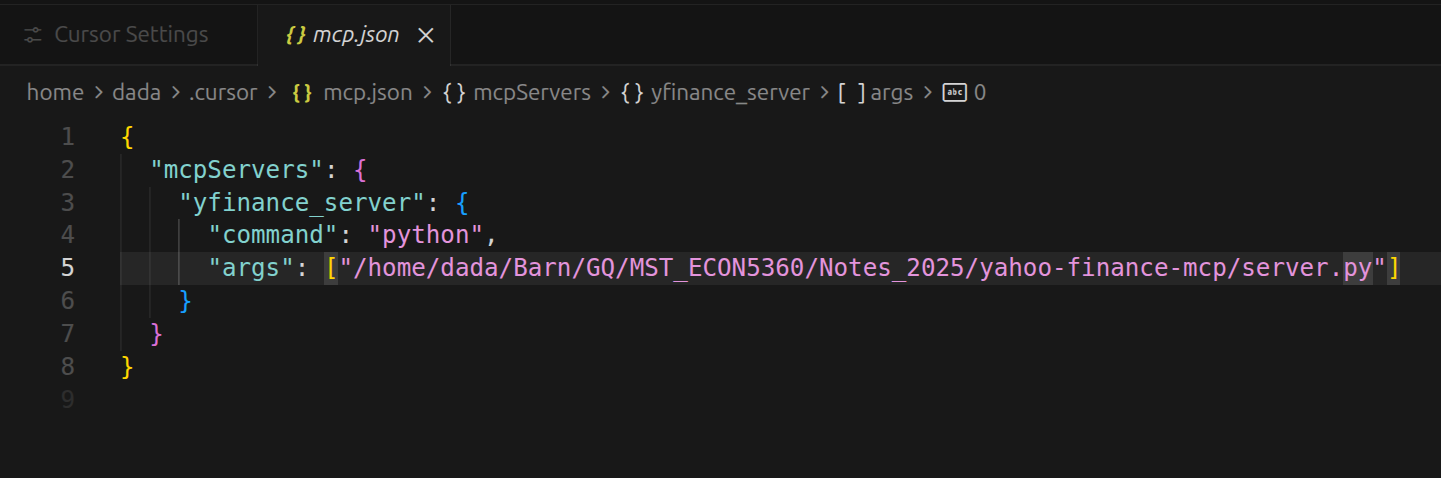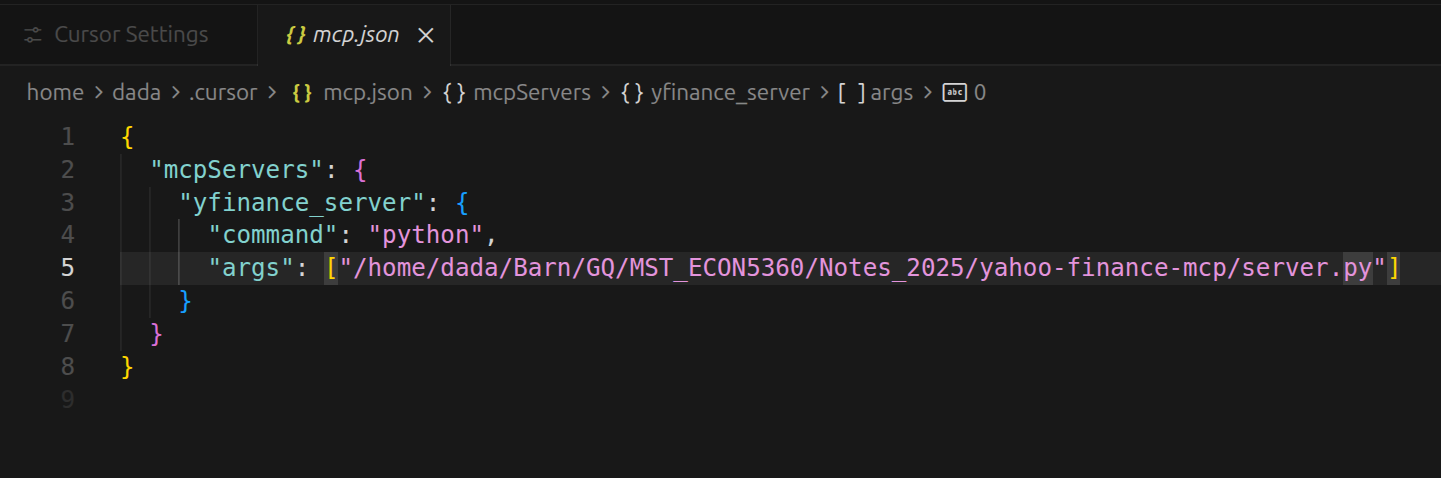

### run MCP tools

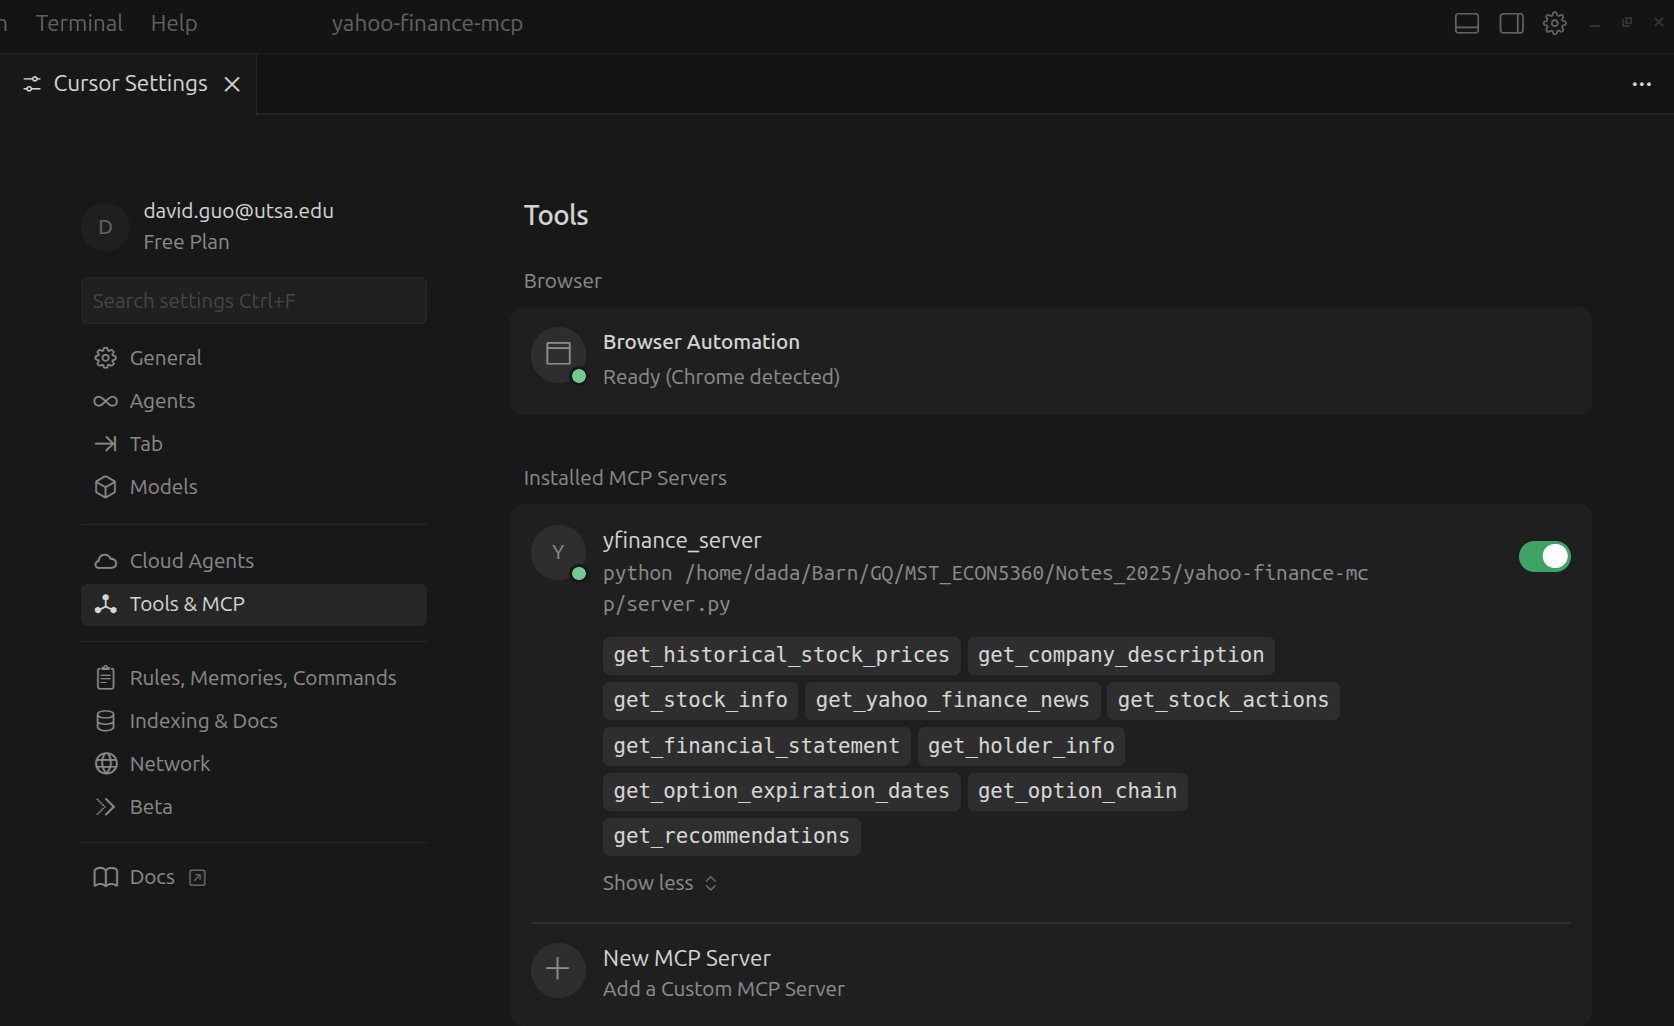

# Open MCP Agent Chatbot

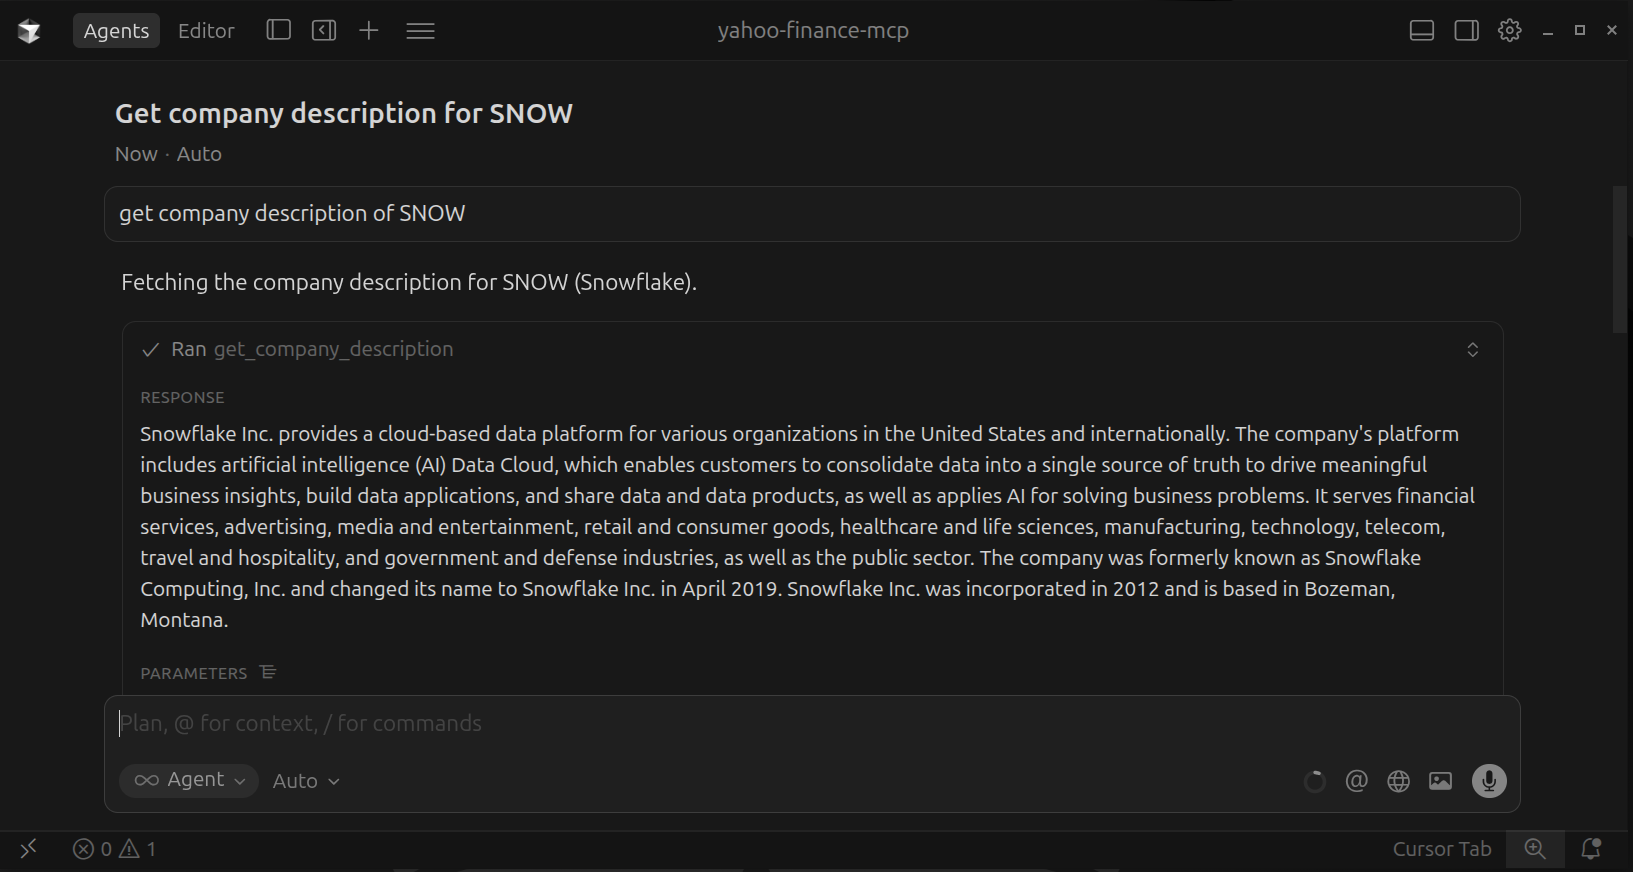

In [30]:
snow_desc = '''Snowflake Inc. provides a cloud-based data platform for various organizations in the United States and internationally. 
The company's platform includes artificial intelligence (AI) Data Cloud, which enables customers to consolidate data into a single 
source of truth to drive meaningful business insights, build data applications, and share data and data products, as well as applies 
AI for solving business problems. It serves financial services, advertising, media and entertainment, retail and consumer goods, 
healthcare and life sciences, manufacturing, technology, telecom, travel and hospitality, and government and defense industries, 
as well as the public sector. The company was formerly known as Snowflake Computing, Inc. and changed its name to Snowflake Inc. 
in April 2019. Snowflake Inc. was incorporated in 2012 and is based in Bozeman, Montana.'''

In [31]:
snow_embedding = embed_model.encode(snow_desc, convert_to_numpy=True)

In [32]:
snow_embedding

array([ 0.01525787, -0.00410253, -0.05278146, ..., -0.036401  ,
       -0.03424776,  0.00195719], dtype=float32)

In [26]:
#default metric "l2", higher nprobe, more accurate the search at the cost a slower query
snow_vect_search = ticker_tbl_reload.search(snow_embedding) \
                                            .limit(10) \
                                            .nprobes(20) \
                                            .refine_factor(100) \
                                            .to_pandas()

In [27]:
snow_vect_search

,id,vector,Description,_distance
0,SNOW,"[0.018367523, 0.0010260047, -0.052080303, -0.0...",Description\nSnowflake Inc. provides a cloud-b...,0.059776
1,INFA,"[0.027738942, 0.003193799, -0.052762363, -0.02...",Description\nInformatica Inc. develops an arti...,0.262782
2,DT,"[0.008711085, 0.011334122, -0.05019534, -0.052...","Description\nDynatrace, Inc. provides a securi...",0.264462
3,DOCN,"[0.005376178, 0.0054241754, -0.04662996, -0.03...","Description\nDigitalOcean Holdings, Inc., thro...",0.272594
4,DOMO,"[0.0066366075, 0.00864185, -0.042716414, -0.04...","Description\nDomo, Inc., together with its sub...",0.274188
5,TDC,"[0.013933337, 0.0073430324, -0.04993566, -0.03...","Description\nTeradata Corporation, together wi...",0.274962
6,BLZE,"[0.026286468, 0.0122283, -0.05317822, -0.03518...","Description\nBackblaze, Inc., a storage cloud ...",0.275021
7,BASE,"[0.026353005, 0.013493456, -0.045548696, -0.02...","Description\nCouchbase, Inc. provides cloud da...",0.276525
8,AVPT,"[0.02366629, -0.010304302, -0.038496938, -0.02...","Description\nAvePoint, Inc. provides cloud-nat...",0.278194
9,MHH,"[0.0074140104, -0.0039932416, -0.03515598, -0....","Description\nMastech Digital, Inc., together w...",0.279123
